In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\Strea\\Google Drive\\JSOM\\Spring 2018\\BUAN 6340 - Programming for DS\\Mid-term Project'

In [3]:
# dataframe 'car' is created 
car = pd.read_csv('mpg.csv')
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
car.info()    # Concise summary about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
car.shape  # returns dimension of the dataframe

(398, 9)

## Data Cleaning

In [6]:
car.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### On investigation, we found out 6 rows with value as '?' in column horsepower of 'car' dataframe

In [7]:
car[car['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


#### Replacing horsepower value '?' with 0

In [8]:
car['horsepower'] = car['horsepower'].replace('?', 0)
car[car['horsepower'] == 0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,0,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,0,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,0,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,0,3035,20.5,82,1,amc concord dl


In [9]:
car.horsepower.dtype

dtype('O')

#### Converting 'horsepower' data type from object to float64

In [10]:
car['horsepower'] = car['horsepower'].astype('float64')
car.horsepower.dtype

dtype('float64')

#### Splitting the column 'name' to 'company' and 'model'

In [11]:
car[['company','model']] = car['name'].str.split(' ',1, expand=True)
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford,torino


In [12]:
car.describe() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Correcting company names

In [13]:
car.company.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [14]:
car['company'] = car['company'].replace('chevy', 'chevrolet')
car['company'] = car['company'].replace('toyouta', 'toyota')
car['company'] = car['company'].replace('chevroelt', 'chevrolet')
car['company'] = car['company'].replace('vw', 'volkswagen')
car['company'] = car['company'].replace('mercedes-benz', 'mercedes')
car['company'] = car['company'].replace('vokswagen', 'volkswagen')
car['company'] = car['company'].replace('maxda', 'mazda')
car.company.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'capri', 'mercedes', 'cadillac', 'triumph', 'nissan'], dtype=object)

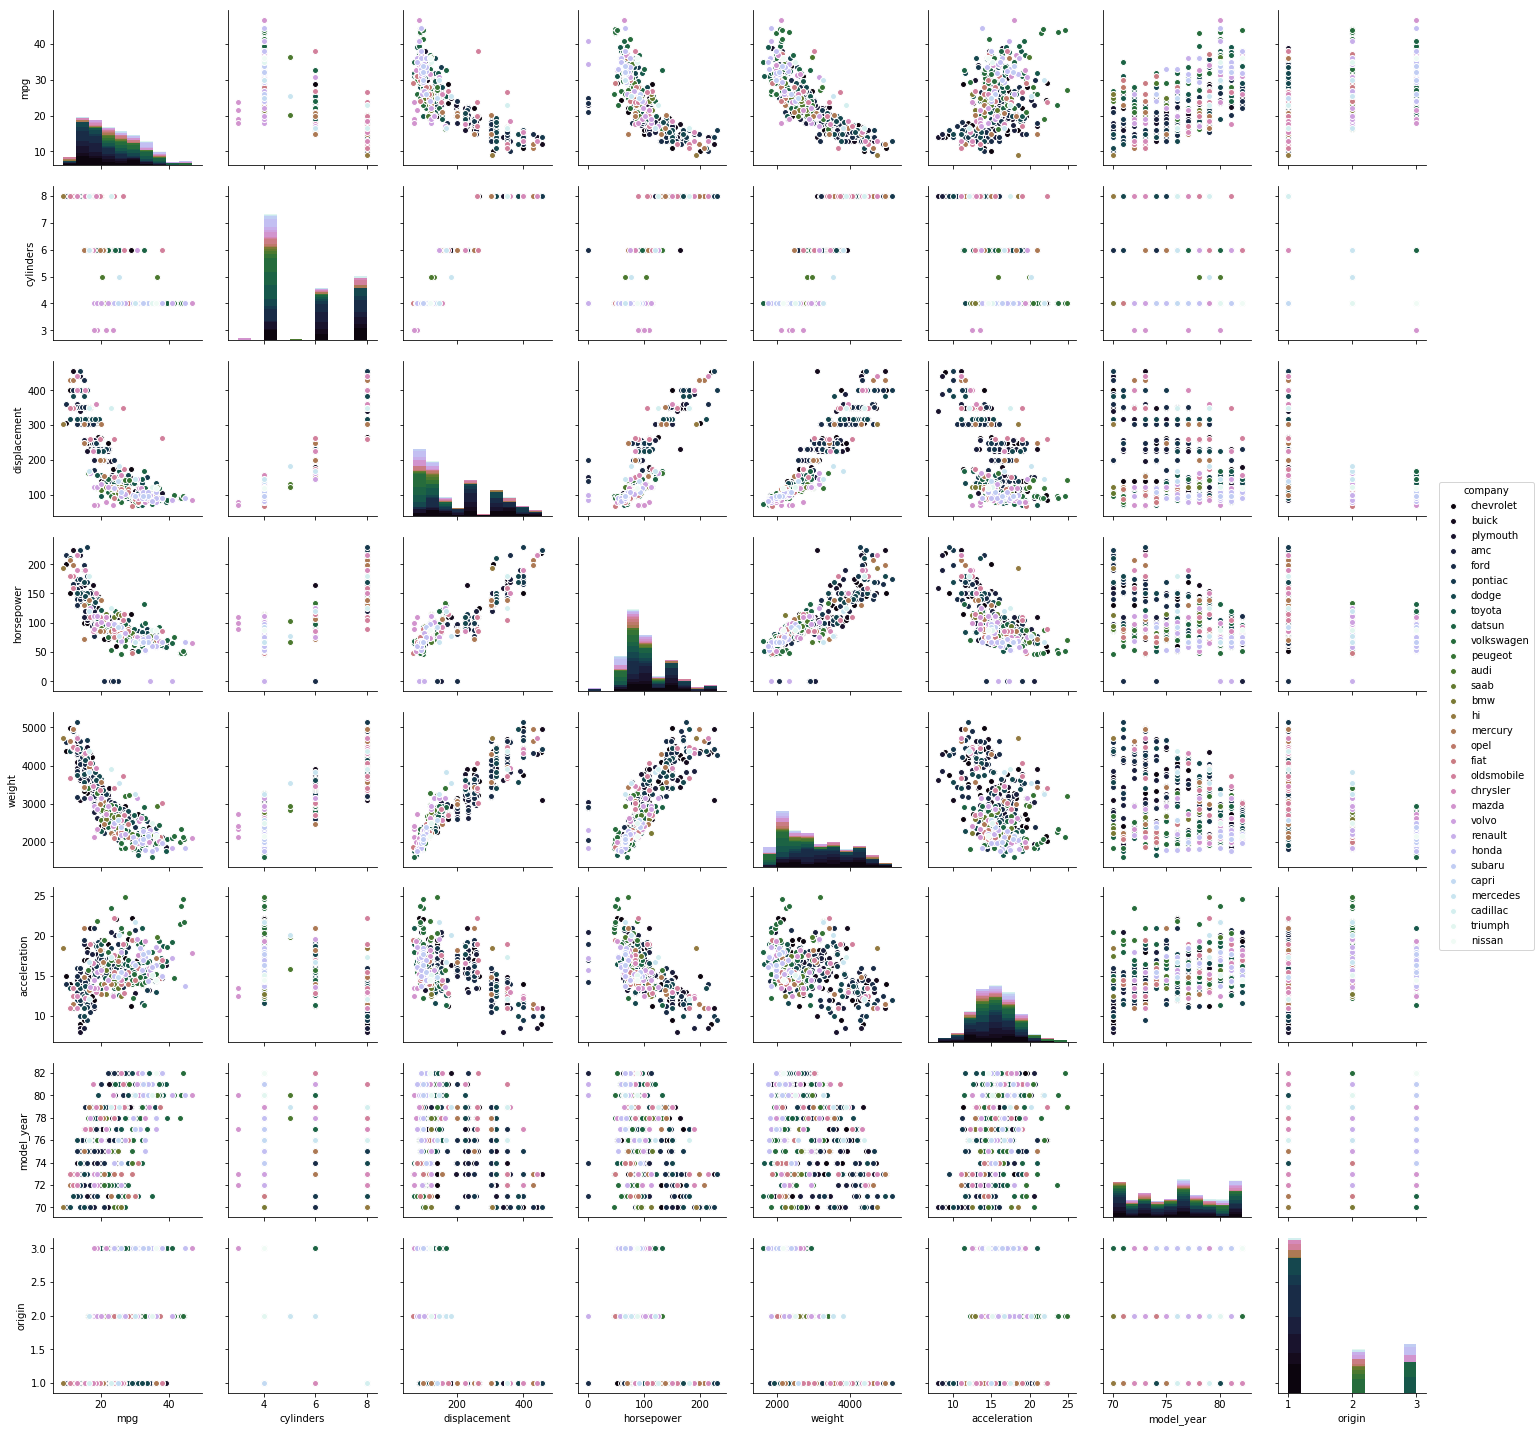

In [15]:
sns.pairplot(car,hue='company',palette='cubehelix')

#### Replacing zero horsepower value of car name 'ford pinto' with the mean value of other ford pinto cars

In [16]:
fp = car[car['name'] == 'ford pinto']
fp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
32,25.0,4,98.0,0.0,2046,19.0,71,1,ford pinto,ford,pinto
112,19.0,4,122.0,85.0,2310,18.5,73,1,ford pinto,ford,pinto
130,26.0,4,122.0,80.0,2451,16.5,74,1,ford pinto,ford,pinto
168,23.0,4,140.0,83.0,2639,17.0,75,1,ford pinto,ford,pinto
174,18.0,6,171.0,97.0,2984,14.5,75,1,ford pinto,ford,pinto
206,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto,ford,pinto


In [17]:
fp1 = fp[fp.horsepower != 0]
car.loc[(car['horsepower'] == 0) & (car['name'] == 'ford pinto'), ['horsepower']] = fp1['horsepower'].mean()
car[car['name'] == 'ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
32,25.0,4,98.0,83.4,2046,19.0,71,1,ford pinto,ford,pinto
112,19.0,4,122.0,85.0,2310,18.5,73,1,ford pinto,ford,pinto
130,26.0,4,122.0,80.0,2451,16.5,74,1,ford pinto,ford,pinto
168,23.0,4,140.0,83.0,2639,17.0,75,1,ford pinto,ford,pinto
174,18.0,6,171.0,97.0,2984,14.5,75,1,ford pinto,ford,pinto
206,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto,ford,pinto


#### Replacing zero horsepower value of car name 'ford maverick' with the mean value of other ford maverick cars

In [18]:
fm = car[car['name'] == 'ford maverick']
fm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
17,21.0,6,200.0,85.0,2587,16.0,70,1,ford maverick,ford,maverick
100,18.0,6,250.0,88.0,3021,16.5,73,1,ford maverick,ford,maverick
126,21.0,6,200.0,0.0,2875,17.0,74,1,ford maverick,ford,maverick
155,15.0,6,250.0,72.0,3158,19.5,75,1,ford maverick,ford,maverick
193,24.0,6,200.0,81.0,3012,17.6,76,1,ford maverick,ford,maverick


In [19]:
fm1 = fm[fm.horsepower != 0]
car.loc[(car['horsepower'] == 0) & (car['name'] == 'ford maverick'), ['horsepower']] = fm1['horsepower'].mean()
car[car['name'] == 'ford maverick']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
17,21.0,6,200.0,85.0,2587,16.0,70,1,ford maverick,ford,maverick
100,18.0,6,250.0,88.0,3021,16.5,73,1,ford maverick,ford,maverick
126,21.0,6,200.0,81.5,2875,17.0,74,1,ford maverick,ford,maverick
155,15.0,6,250.0,72.0,3158,19.5,75,1,ford maverick,ford,maverick
193,24.0,6,200.0,81.0,3012,17.6,76,1,ford maverick,ford,maverick


In [20]:
car[car['company'] == 'renault']    # All the renault cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
79,26.0,4,96.0,69.0,2189,18.0,72,2,renault 12 (sw),renault,12 (sw)
186,27.0,4,101.0,83.0,2202,15.3,76,2,renault 12tl,renault,12tl
218,36.0,4,79.0,58.0,1825,18.6,77,2,renault 5 gtl,renault,5 gtl
330,40.9,4,85.0,0.0,1835,17.3,80,2,renault lecar deluxe,renault,lecar deluxe
354,34.5,4,100.0,0.0,2320,15.8,81,2,renault 18i,renault,18i


#### Replacing renault 18i zero horsepower value with the horsepower of renault 12tl i.e. 83 as the features of both the cars are somewhat similar

In [21]:
car[car['name'] == 'renault 18i']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
354,34.5,4,100.0,0.0,2320,15.8,81,2,renault 18i,renault,18i


In [22]:
car.loc[(car['horsepower'] == 0) & (car['name'] == 'renault 18i'), ['horsepower']] = 83

##### From the pairplot, we can infer that horsepower is roughly increasing with the increment in displacement and weight and we will use this information to deal with missing horsepowers of cars

#### Replacing 'renault lecar deluxe' zero horsepower value with similar horsepower of 60 of 'renault 5 gtl' which is having displacement and weight feature similar to  'ford mustang cobra'

In [23]:
car[car['name'] == 'renault lecar deluxe']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
330,40.9,4,85.0,0.0,1835,17.3,80,2,renault lecar deluxe,renault,lecar deluxe


In [24]:
car.loc[(car['horsepower'] == 0) & (car['name'] == 'renault lecar deluxe'), ['horsepower']] = 60

In [25]:
car[car['company'] == 'renault']  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
79,26.0,4,96.0,69.0,2189,18.0,72,2,renault 12 (sw),renault,12 (sw)
186,27.0,4,101.0,83.0,2202,15.3,76,2,renault 12tl,renault,12tl
218,36.0,4,79.0,58.0,1825,18.6,77,2,renault 5 gtl,renault,5 gtl
330,40.9,4,85.0,60.0,1835,17.3,80,2,renault lecar deluxe,renault,lecar deluxe
354,34.5,4,100.0,83.0,2320,15.8,81,2,renault 18i,renault,18i


#### Replacing 'ford mustang cobra' zero horsepower value with similar horsepower of 92 of other ford cars which are having displacement and weight feature similar to  'ford mustang cobra'

In [26]:
car[car['name'] == 'ford mustang cobra']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
336,23.6,4,140.0,0.0,2905,14.3,80,1,ford mustang cobra,ford,mustang cobra


In [27]:
car[(car['company'] == 'ford') & (car['displacement'] == 140) & (car['weight'] >= 2850)]  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
282,22.3,4,140.0,88.0,2890,17.3,79,1,ford fairmont 4,ford,fairmont 4
314,26.4,4,140.0,88.0,2870,18.1,80,1,ford fairmont,ford,fairmont
336,23.6,4,140.0,0.0,2905,14.3,80,1,ford mustang cobra,ford,mustang cobra
373,24.0,4,140.0,92.0,2865,16.4,82,1,ford fairmont futura,ford,fairmont futura


In [28]:
car.loc[(car['horsepower'] == 0) & (car['name'] == 'ford mustang cobra'), ['horsepower']] = 92
car[car['name'] == 'ford mustang cobra']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
336,23.6,4,140.0,92.0,2905,14.3,80,1,ford mustang cobra,ford,mustang cobra


#### Similarly, replacing zero horsepower value of 'amc concord dl' with 90

In [29]:
car[car['name'] == 'amc concord dl']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
374,23.0,4,151.0,0.0,3035,20.5,82,1,amc concord dl,amc,concord dl


In [30]:
car[(car['company'] == 'amc') & (car['displacement'] == 151) & (car['weight'] >= 3000)]  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
315,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord,amc,concord
374,23.0,4,151.0,0.0,3035,20.5,82,1,amc concord dl,amc,concord dl


In [31]:
car.loc[(car['horsepower'] == 0) & (car['name'] == 'amc concord dl'), ['horsepower']] = 90
car[car['name'] == 'amc concord dl']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company,model
374,23.0,4,151.0,90.0,3035,20.5,82,1,amc concord dl,amc,concord dl


## Exploratory Data Analysis

#### Histogram of numeric variables

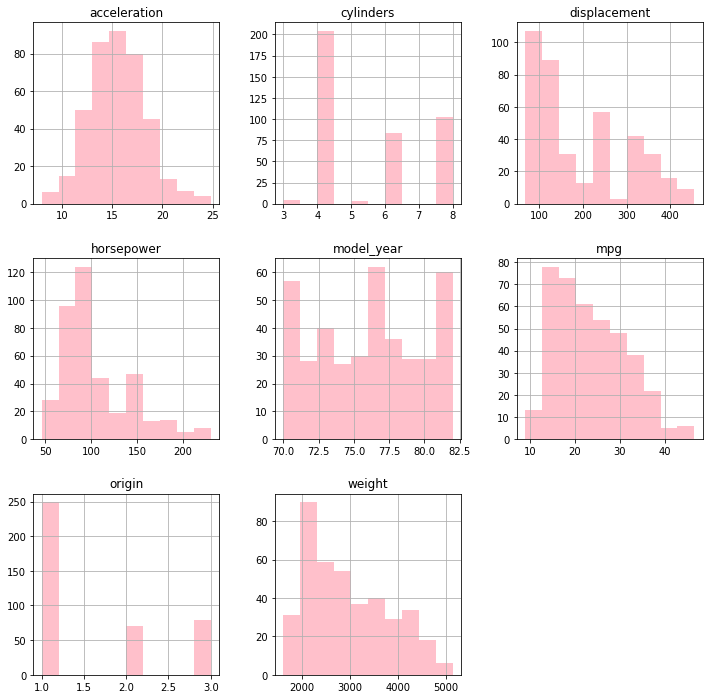

In [32]:
car.hist(color = 'pink', figsize=(12,12))
plt.show()

##### displacement, horsepower and weight have skewed data distribution which will be treated later on before we start building regression model

#### distribution plot for mpg

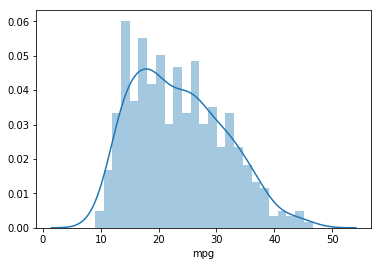

In [33]:
sns.distplot(car.mpg,bins=25)

#### Box plot for mpg over the years

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'miles per gallon by year')

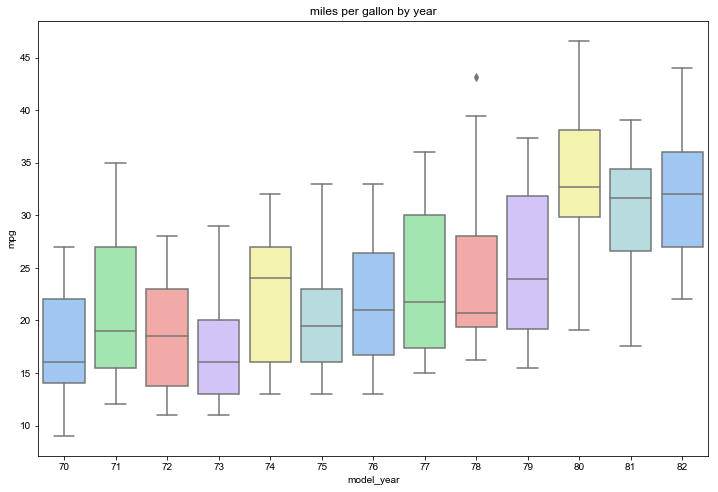

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_style('darkgrid')
sns.boxplot(x='model_year', y='mpg', data= car, palette='pastel').set_title('miles per gallon by year')

##### We can see that the median value of miles per gallon has steadily increased over the years.

### Bar plot for mpg by company

Text(0.5,1,'miles per gallon by car manufacturer')

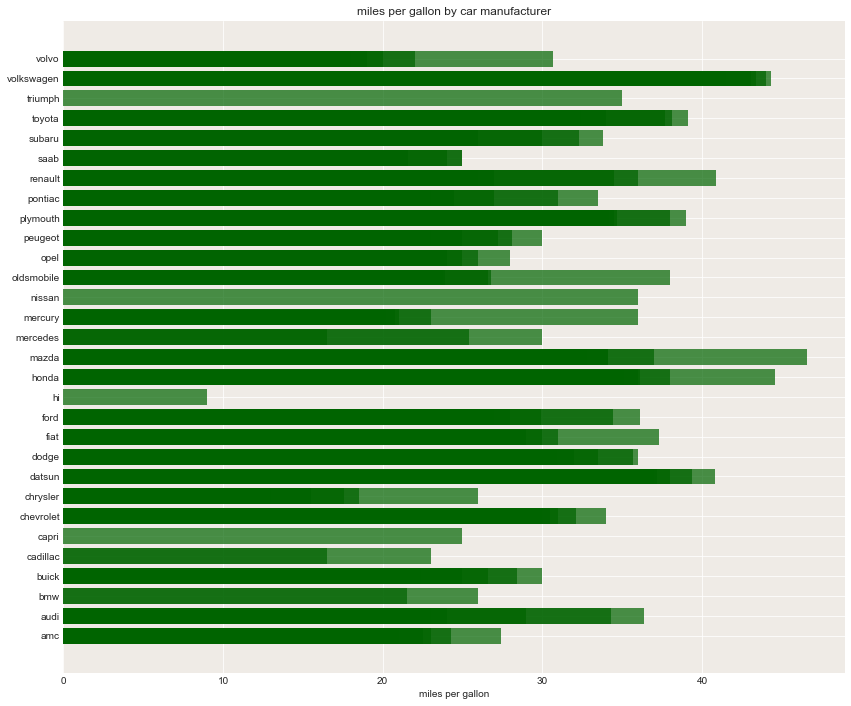

In [36]:
fig = plt.figure(figsize=(14, 12))
plt.rc('axes',facecolor='#efebe6', edgecolor='none', axisbelow=True, grid=True)
plt.barh(car['company'], car['mpg'], align='center',color = 'darkgreen', alpha=0.7)
plt.xlabel('miles per gallon')
plt.title('miles per gallon by car manufacturer')

##### Volkswagen, honda and mazda cars have highest miles per gallon among all other cars

#### Box plot for mpg by country of origin

In [37]:
# Updating origin column with actual country names
car_country = car.copy()
car_country['Country'] = car_country.origin.replace([1,2,3],['USA','Europe','Japan'])

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'miles per gallon by country')

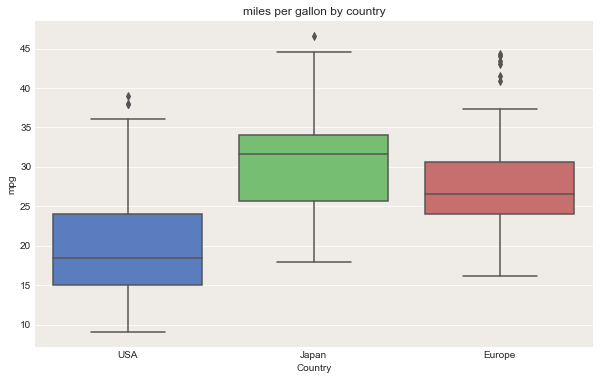

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('darkgrid')
sns.boxplot(x='Country', y='mpg', data= car_country, palette='muted').set_title('miles per gallon by country')

##### Japan manufactured cars have better miles per gallon than the cars manufactured in Europe and USA

#### Correlation heatmap

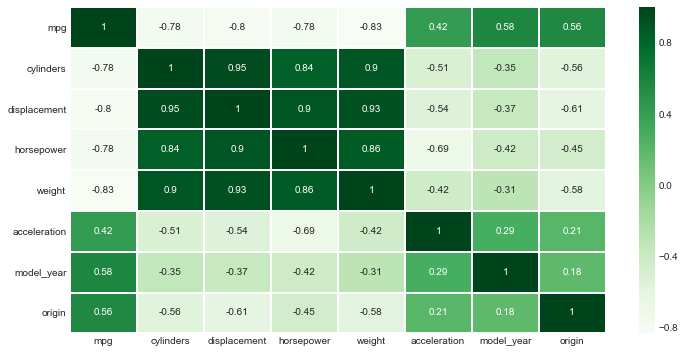

In [39]:
fig, ax  = plt.subplots(figsize=(12, 6))
sns.heatmap(car.corr(),cmap = 'Greens',linecolor='white',linewidths=1,annot = True)

##### displacement, horsepower, and weight are highly correlated to mpg

### Transforming variables 'displacement','horsepower' and 'weight' by taking log as the distribution are skewed

In [40]:
car['displacement'] = np.log(car['displacement'])
car['horsepower'] = np.log(car['horsepower'])
car['weight'] = np.log(car['weight'])

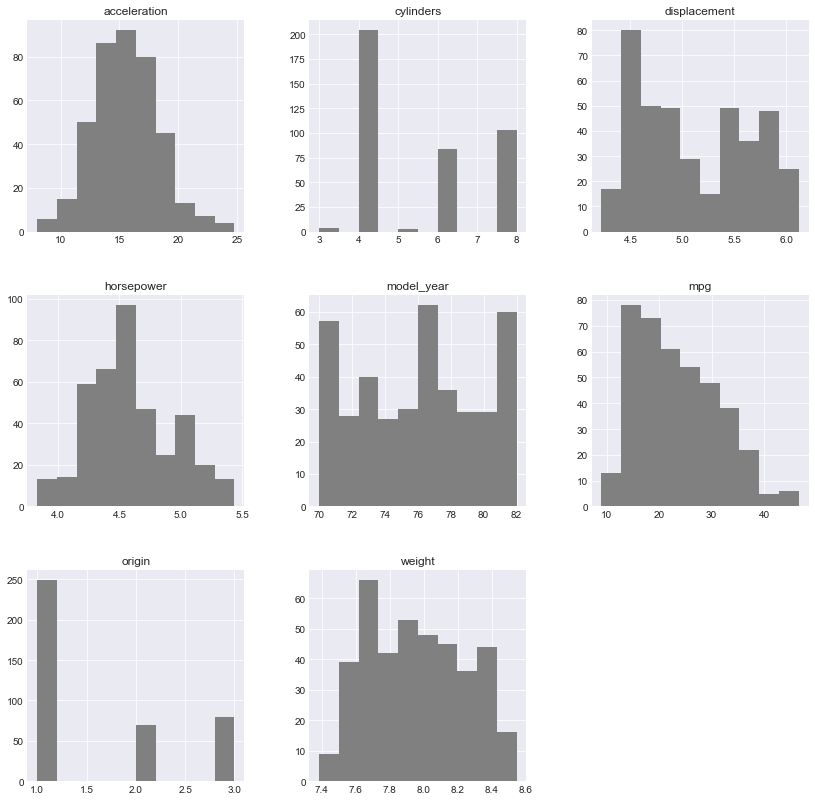

In [41]:
# Histogram after log transformation
car.hist(color = 'Grey', figsize=(14,14))
plt.show()

In [42]:
car.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'company', 'model'],
      dtype='object')

### Splitting the data into predictor variables and target variable

In [43]:
# 'X' -> predictor variables ,  'Y' -> target variable
feature = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration','origin','model_year']
X = car[feature]
y = car['mpg']

#### Scaling 'X' using MinMaxScaler to bring the value range of predictors from 0 to 1

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Building Linear Regression Model

### Train test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=123)

### Training model

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [47]:
# print the intercept
print(lm.intercept_)

34.91282135726644


In [48]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
cylinders,4.527902
displacement,-6.643871
horsepower,-13.948398
weight,-12.438425
acceleration,-5.367029
origin,2.057062
model_year,8.192298


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **cylinders** is associated with an **increase of 4.53 units mpg **.
- Holding all other features fixed, a 1 unit increase in **displacement** is associated with an **decrease of 6.64 units mpg **.
- Holding all other features fixed, a 1 unit increase in **horsepower** is associated with an **decrease of 13.95 units mpg**.
- Holding all other features fixed, a 1 unit increase in **weight** is associated with an **decrease of 12.44 units mpg**.
- Holding all other features fixed, a 1 unit increase in **acceleration** is associated with an **decrease of 5.37 units mpg **.
- Holding all other features fixed, a 1 unit increase in **origin** is associated with an **increase of 2.06 units mpg **.
- Holding all other features fixed, a 1 unit increase in **model_year** is associated with an **increase of 8.19 units mpg **.

### Prediction

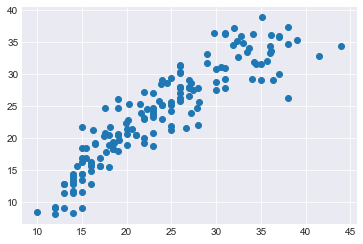

In [49]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

#### Residual histogram

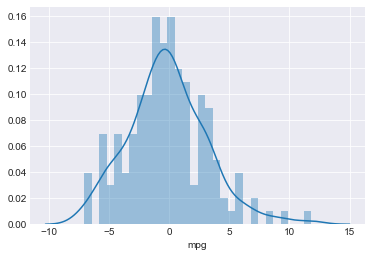

In [50]:
sns.distplot((y_test-predictions),bins=30)

### Regression Evaluation Metrics

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.4975390509983852
MSE: 10.681971537276485
RMSE: 3.268328554058861
